# Example Usage

In [1]:
import glob
import json
import numpy as np
import os 
from PIL import Image
from PIL import ImageFont, ImageDraw
from matplotlib import pyplot as plt

In [2]:
color_pallete = {'abbreviation': (128, 128, 128), 
                 'abstract': (220, 220, 200), 
                 'acknowledgement': (47, 79, 79), 
                 'additional_file': (85, 107, 47), 
                 'affiliation': (160, 82, 45), 
                 'appendice': (46, 139, 87), 
                 'article_history': (127, 0, 0), 
                 'author_bio': (128, 128, 0),
                 'author_contribution': (72, 61, 139), 
                 'author_name': (0, 128, 0),
                 'availability_of_data': (0, 139, 139), 
                 'caption': (70, 130, 180),
                 'citation': (180, 0, 128),
                 'code': (0, 0, 128), 
                 'conflict_int': (154, 205, 50), 
                 'consent_publication': (218, 165, 32),
                 'contact_info': (143, 188, 143), 
                 'copyright': (128, 0, 128), 
                 'core_text': (176, 48, 96), 
                 'corresponding_author': (210, 180, 140), 
                 'date': (255, 0, 0), 
                 'doi': (0, 206, 209), 
                 'editor': (255, 140, 0), 
                 'ethics': (0, 255, 0), 
                 'figure': (0, 255, 127), 
                 'funding_info': (220, 20, 60), 
                 'highlights': (244, 164, 96), 
                 'index': (147, 112, 219), 
                 'journal': (0, 0, 255), 
                 'keywords': (160, 32, 240), 
                 'list': (240, 128, 128), 
                 'math_formula': (173, 255, 47), 
                 'msc': (218, 112, 214), 
                 'nomenclature': (255, 0, 255), 
                 'note': (30, 144, 255), 
                 'publisher': (240, 230, 140), 
                 'publisher_note': (255, 255, 84), 
                 'reference': (221, 160, 221), 
                 'section_heading': (144, 238, 144), 
                 'subheading': (135, 206, 235), 
                 'table': (127, 255, 212), 
                 'title': (255, 105, 180), 
                 'urls_to_supplementary': (255, 182, 193)}

## Data Parsing Functions

In [3]:
def parse_annotation(json_path, annotation_dir):
    anno_json = open(json_path, 'r')
    data = json.load(anno_json)
    anno_json.close()
    
    img_path = data['imagePath']
    print(img_path)
    
    annotations = []
    for annotation in data['shapes']:
        class_name = annotation['label'].lower()
        x = int(annotation['points'][0][0])
        y = int(annotation['points'][0][1])
        w = int(annotation['points'][1][0]) - x
        h = int(annotation['points'][1][1]) - y
        
        if w < 0 or h < 0:
            print("Invalid citation annotation in {}".format(json_path))
            continue
        
        annotations.append((class_name, x, y, w, h))
    
    
    return {img_path: annotations}

## Collecting Annotations

In [4]:
annotation_jsons = glob.glob("example/annotations/*json")

annotations = {}
for json_path in annotation_jsons:
    annotation = parse_annotation(json_path, "annotations")
    annotations.update(annotation)

dad/documents/ELS_HS_AMP_2015_V2_1/ELS_HS_AMP_2015_V2_1-1.jpg


In [5]:
citation_annotation_jsons = glob.glob("example/citation_annotations/*json")

citation_annotations = {}
for json_path in citation_annotation_jsons:
    annotation = parse_annotation(json_path, "citation_annotations")
    citation_annotations.update(annotation)

dad/documents/ELS_HS_AMP_2015_V2_1/ELS_HS_AMP_2015_V2_1-1.jpg
dad/documents/ELS_HS_AMP_2015_V2_1/ELS_HS_AMP_2015_V2_1-2.jpg
dad/documents/ELS_HS_AMP_2015_V2_1/ELS_HS_AMP_2015_V2_1-3.jpg
dad/documents/ELS_HS_AMP_2015_V2_1/ELS_HS_AMP_2015_V2_1-4.jpg
dad/documents/ELS_HS_AMP_2015_V2_1/ELS_HS_AMP_2015_V2_1-5.jpg
dad/documents/ELS_HS_AMP_2015_V2_1/ELS_HS_AMP_2015_V2_1-6.jpg
dad/documents/ELS_HS_AMP_2015_V2_1/ELS_HS_AMP_2015_V2_1-7.jpg


## Markup Function

In [6]:
def markup(image, annotations):
    ''' 
        Borrowed from publaynet
    '''
    font = ImageFont.truetype("example/DejaVuSans.ttf", 22)
    draw = ImageDraw.Draw(image, 'RGBA')
    for annotation in annotations:
        # Get data
        class_name, x, y, w, h = annotation
        
        # Draw bbox
        draw.rectangle((x, y, x + w, y + h),
                       outline=color_pallete[class_name] + (255,),
                       width=2)
        
        # Draw label
        if class_name != 'citation':
            l_w, l_h = draw.textsize(text=class_name, font=font)
            if h < l_h:
                draw.rectangle((x + w, y, x + w + l_w, y + l_h),
                               fill=(64, 64, 64, 255))
                draw.text((x + w, y),
                          text=class_name,
                          fill=(255, 255, 255, 255),
                          font=font)
            else:
                draw.rectangle((x, y, x + l_w, y + l_h),
                               fill=(64, 64, 64, 255))
                draw.text((x, y),
                          text=class_name,
                          fill=(255, 255, 255, 255),
                          font=font)
    return np.array(image)

## Display Data

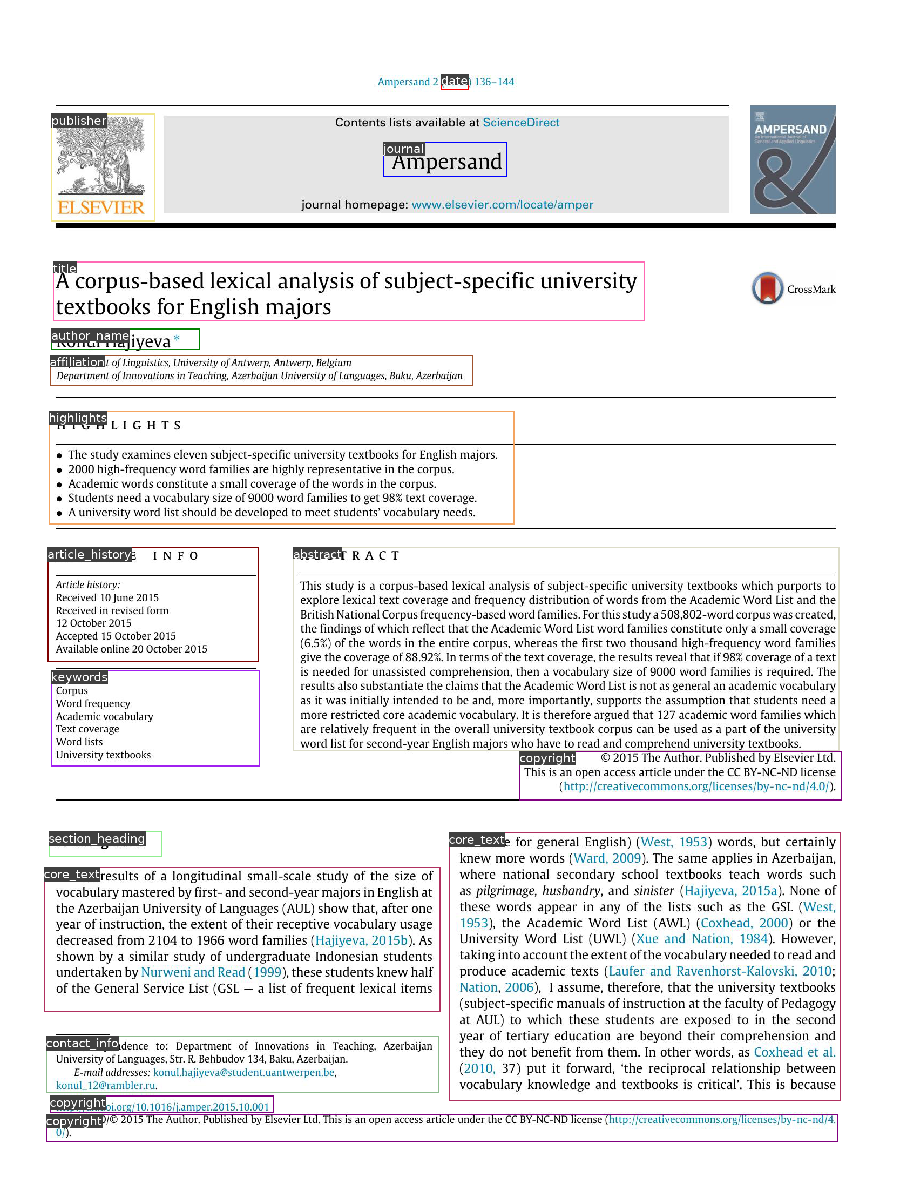

In [7]:
fig=plt.figure(figsize=(32, 100)) 
for i, (img_path, annotation) in enumerate(annotations.items()):
    with Image.open(img_path) as img:
        ax = plt.subplot((len(annotations) / 2) + 1, 2, i + 1)
        ax.imshow(markup(img, annotation))
        ax.axis('off')
plt.subplots_adjust(hspace=0, wspace=0)

## Display Citations

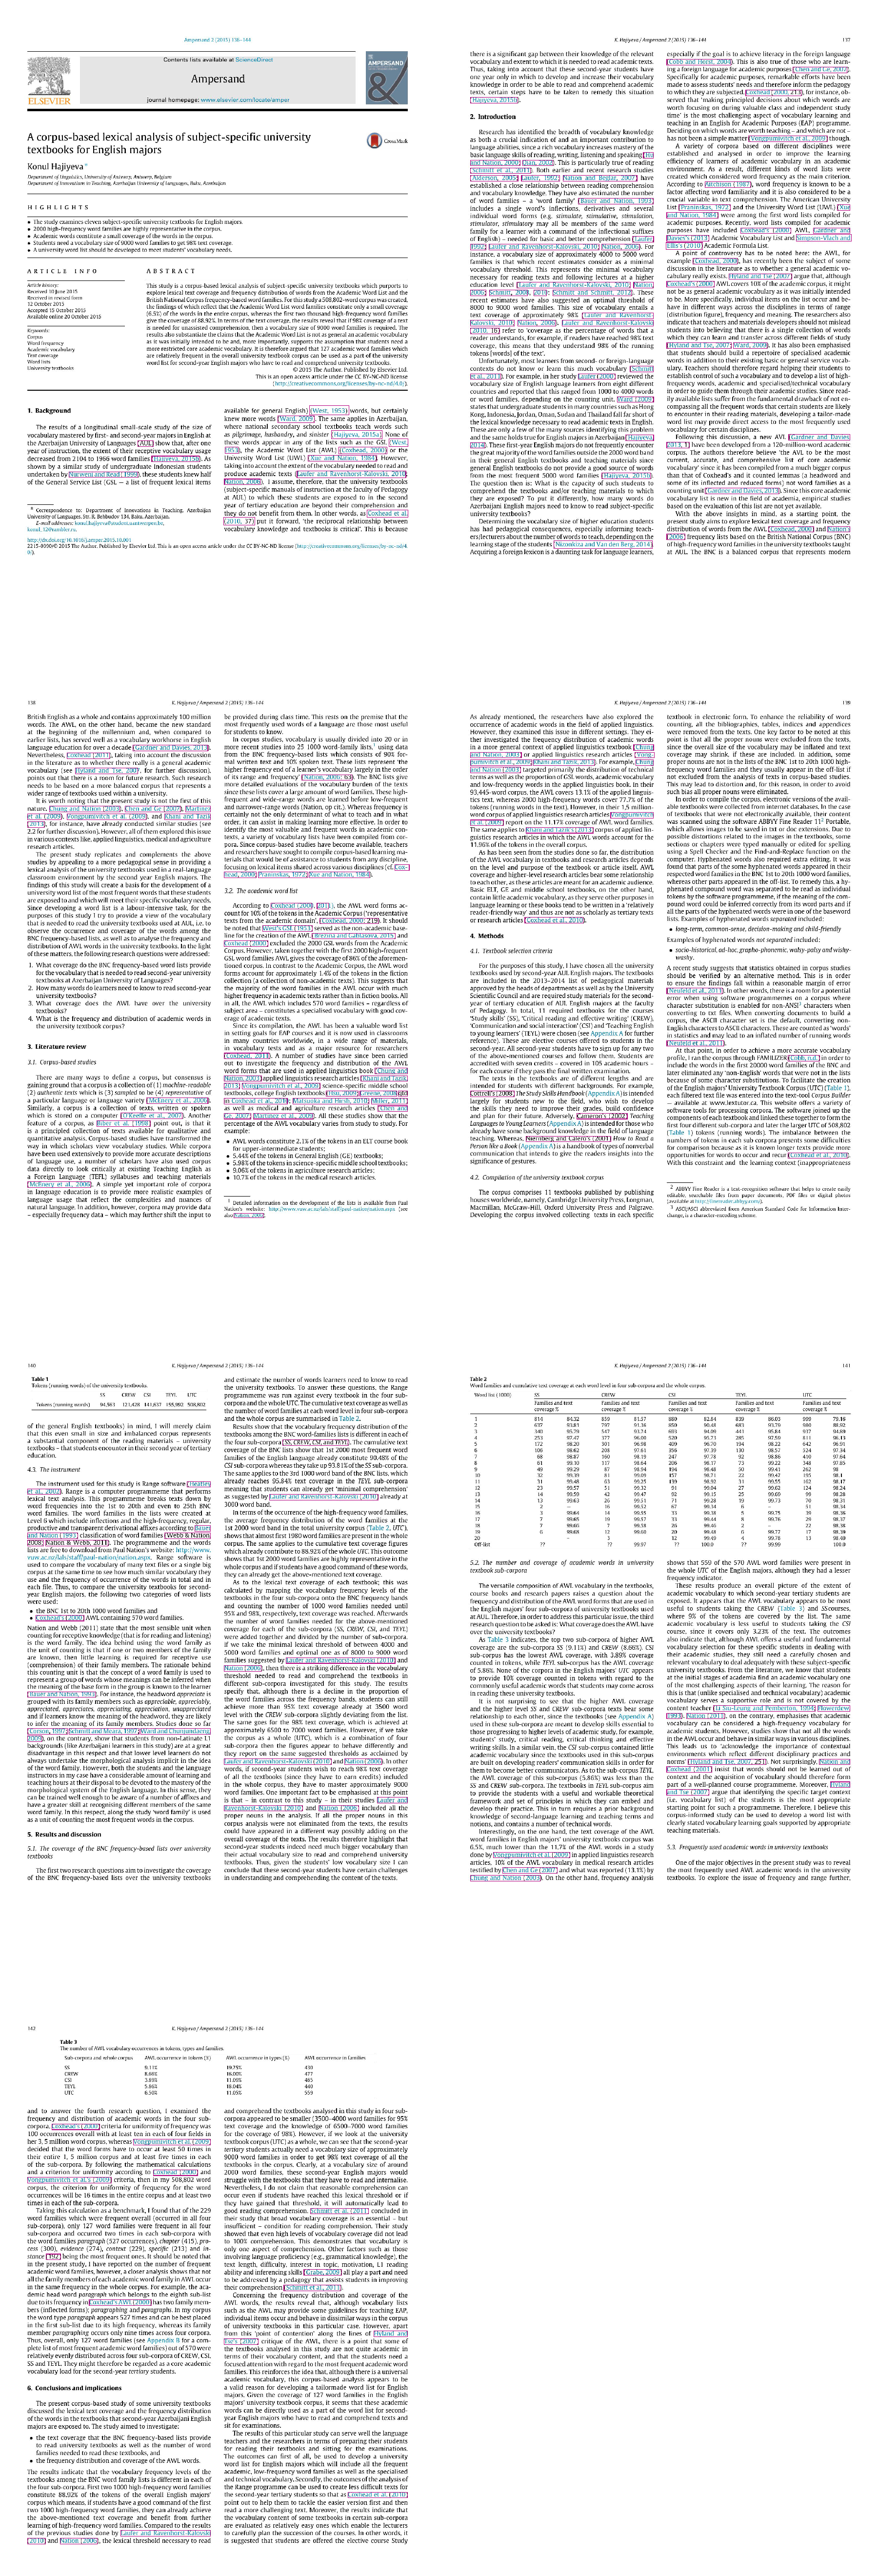

In [8]:
fig=plt.figure(figsize=(32, 100)) 
for i, (img_path, annotation) in enumerate(citation_annotations.items()):
    with Image.open(img_path) as img:
        ax = plt.subplot((len(citation_annotations) / 2) + 1, 2, i + 1)
        ax.imshow(markup(img, annotation))
        ax.axis('off')
plt.subplots_adjust(hspace=0, wspace=0)